In [20]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

In [21]:
from daclib.benchmarks import LubyBenchmark
from daclib.wrappers import EpisodeTimeWrapper, ActionFrequencyWrapper, StateTrackingWrapper, InstanceSamplingWrapper, RewardNoiseWrapper
from examples.example_utils import q_learning

In [22]:
# Get replica environment
bench = LubyBenchmark()
env = bench.get_benchmark(L=8, fuzziness=1)

In [23]:
# Get base env
bench.config.seed = 0
env = bench.get_benchmark_env()

In [24]:
Q, stats = q_learning(env, num_episodes=5)
print(f"Rewards: {stats[1].episode_rewards}")

Episode     5/5.
Rewards: [-5. -3. -8. -5. -3.]


In [25]:
env = bench.get_benchmark_env()
env = RewardNoiseWrapper(env)
Q, stats = q_learning(env, num_episodes=5)
print(f"Rewards: {stats[1].episode_rewards}")

Episode     5/5.
Rewards: [8. 8. 8. 8. 8.]


In [7]:
env = bench.get_benchmark_env()
env = RewardNoiseWrapper(env, noise_dist="exponential", dist_args=[0.3])
Q, stats = q_learning(env, num_episodes=5)
print(f"Rewards: {stats[1].episode_rewards}")

Episode     5/5.
Rewards: [8. 8. 8. 8. 8.]


In [8]:
def dummy_noise():
    return 1
env = bench.get_benchmark_env()
env = RewardNoiseWrapper(env, noise_function=dummy_noise)
Q, stats = q_learning(env, num_episodes=5)
print(f"Rewards: {stats[1].episode_rewards}")

Episode     5/5.
Rewards: [8. 8. 8. 8. 8.]


In [9]:
env = bench.get_benchmark_env()
print(env.instance_set)

[[0, 0]]


In [10]:
new_instance_set = [[1, 2], [3, 4]]
env.instance_set = new_instance_set
print(env.instance_set)

[[1, 2], [3, 4]]


In [11]:
bench.config.instance_set_path = "../instance_sets/luby_train.csv"
bench.read_instance_set()
env = bench.get_benchmark_env()
print(env.instance_set)

[[34.0, -0.07], [5.0, -0.12], [16.0, 0.04], [39.0, 0.06], [23.0, 0.06], [23.0, 0.26], [0.0, -0.19], [9.0, 0.06], [26.0, 0.17], [39.0, 0.09], [19.0, 0.09], [13.0, -0.07], [13.0, 0.09], [50.0, 0.07], [25.0, -0.14], [1.0, 0.13], [32.0, -0.29], [14.0, 0.01], [17.0, -0.24], [31.0, 0.09], [26.0, 0.0], [26.0, -0.2], [6.0, -0.1], [13.0, -0.02], [21.0, -0.14], [15.0, -0.14], [24.0, 0.22], [18.0, -0.16], [14.0, -0.05], [28.0, 0.2], [11.0, -0.07], [16.0, -0.13], [4.0, 0.07], [25.0, 0.03], [41.0, 0.05], [31.0, -0.0], [10.0, 0.08], [14.0, -0.11], [7.0, 0.12], [14.0, 0.21], [36.0, 0.01], [7.0, 0.09], [11.0, -0.0], [7.0, -0.06], [19.0, -0.07], [24.0, 0.12], [28.0, 0.25], [3.0, 0.2], [10.0, 0.14], [32.0, -0.26], [6.0, -0.08], [18.0, -0.2], [4.0, 0.01], [21.0, 0.16], [19.0, 0.03], [21.0, -0.1], [32.0, -0.02], [1.0, 0.26], [19.0, 0.0], [20.0, -0.0], [34.0, 0.01], [2.0, 0.03], [18.0, 0.23], [12.0, -0.09], [3.0, -0.01], [13.0, -0.28], [21.0, 0.09], [22.0, -0.03], [0.0, 0.2], [25.0, -0.15], [9.0, 0.04], [1

In [12]:
def sample_luby():
    return [np.random.uniform(-5, 5), np.random.uniform(-1, 1)]
env = bench.get_benchmark_env()
env = InstanceSamplingWrapper(env, sampling_function=sample_luby)
print(env.instance_set)
env.reset()
print(env.instance_set)

[[34.0, -0.07], [5.0, -0.12], [16.0, 0.04], [39.0, 0.06], [23.0, 0.06], [23.0, 0.26], [0.0, -0.19], [9.0, 0.06], [26.0, 0.17], [39.0, 0.09], [19.0, 0.09], [13.0, -0.07], [13.0, 0.09], [50.0, 0.07], [25.0, -0.14], [1.0, 0.13], [32.0, -0.29], [14.0, 0.01], [17.0, -0.24], [31.0, 0.09], [26.0, 0.0], [26.0, -0.2], [6.0, -0.1], [13.0, -0.02], [21.0, -0.14], [15.0, -0.14], [24.0, 0.22], [18.0, -0.16], [14.0, -0.05], [28.0, 0.2], [11.0, -0.07], [16.0, -0.13], [4.0, 0.07], [25.0, 0.03], [41.0, 0.05], [31.0, -0.0], [10.0, 0.08], [14.0, -0.11], [7.0, 0.12], [14.0, 0.21], [36.0, 0.01], [7.0, 0.09], [11.0, -0.0], [7.0, -0.06], [19.0, -0.07], [24.0, 0.12], [28.0, 0.25], [3.0, 0.2], [10.0, 0.14], [32.0, -0.26], [6.0, -0.08], [18.0, -0.2], [4.0, 0.01], [21.0, 0.16], [19.0, 0.03], [21.0, -0.1], [32.0, -0.02], [1.0, 0.26], [19.0, 0.0], [20.0, -0.0], [34.0, 0.01], [2.0, 0.03], [18.0, 0.23], [12.0, -0.09], [3.0, -0.01], [13.0, -0.28], [21.0, 0.09], [22.0, -0.03], [0.0, 0.2], [25.0, -0.15], [9.0, 0.04], [1

In [13]:
env = bench.get_benchmark_env()
env = InstanceSamplingWrapper(env, instances=env.instance_set)
print(env.instance_set)
env.reset()
print(env.instance_set)

[[34.0, -0.07], [5.0, -0.12], [16.0, 0.04], [39.0, 0.06], [23.0, 0.06], [23.0, 0.26], [0.0, -0.19], [9.0, 0.06], [26.0, 0.17], [39.0, 0.09], [19.0, 0.09], [13.0, -0.07], [13.0, 0.09], [50.0, 0.07], [25.0, -0.14], [1.0, 0.13], [32.0, -0.29], [14.0, 0.01], [17.0, -0.24], [31.0, 0.09], [26.0, 0.0], [26.0, -0.2], [6.0, -0.1], [13.0, -0.02], [21.0, -0.14], [15.0, -0.14], [24.0, 0.22], [18.0, -0.16], [14.0, -0.05], [28.0, 0.2], [11.0, -0.07], [16.0, -0.13], [4.0, 0.07], [25.0, 0.03], [41.0, 0.05], [31.0, -0.0], [10.0, 0.08], [14.0, -0.11], [7.0, 0.12], [14.0, 0.21], [36.0, 0.01], [7.0, 0.09], [11.0, -0.0], [7.0, -0.06], [19.0, -0.07], [24.0, 0.12], [28.0, 0.25], [3.0, 0.2], [10.0, 0.14], [32.0, -0.26], [6.0, -0.08], [18.0, -0.2], [4.0, 0.01], [21.0, 0.16], [19.0, 0.03], [21.0, -0.1], [32.0, -0.02], [1.0, 0.26], [19.0, 0.0], [20.0, -0.0], [34.0, 0.01], [2.0, 0.03], [18.0, 0.23], [12.0, -0.09], [3.0, -0.01], [13.0, -0.28], [21.0, 0.09], [22.0, -0.03], [0.0, 0.2], [25.0, -0.15], [9.0, 0.04], [1

In [26]:
env = bench.get_benchmark_env()
env = InstanceSamplingWrapper(env, instances=env.instance_set)
env = RewardNoiseWrapper(env, noise_dist="normal", dist_args=[0, 0.5])
env = ActionFrequencyWrapper(env)
env = StateTrackingWrapper(env)
env = EpisodeTimeWrapper(env, 5)

In [27]:
Q, stats = q_learning(env, num_episodes=20)
print(f"Rewards: {stats[1].episode_rewards}")

Episode    20/20.
Rewards: [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]


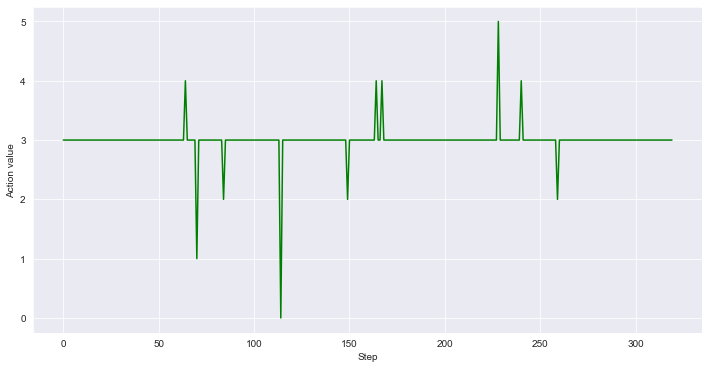

In [28]:
action_img = env.render_action_tracking()
plt.show()

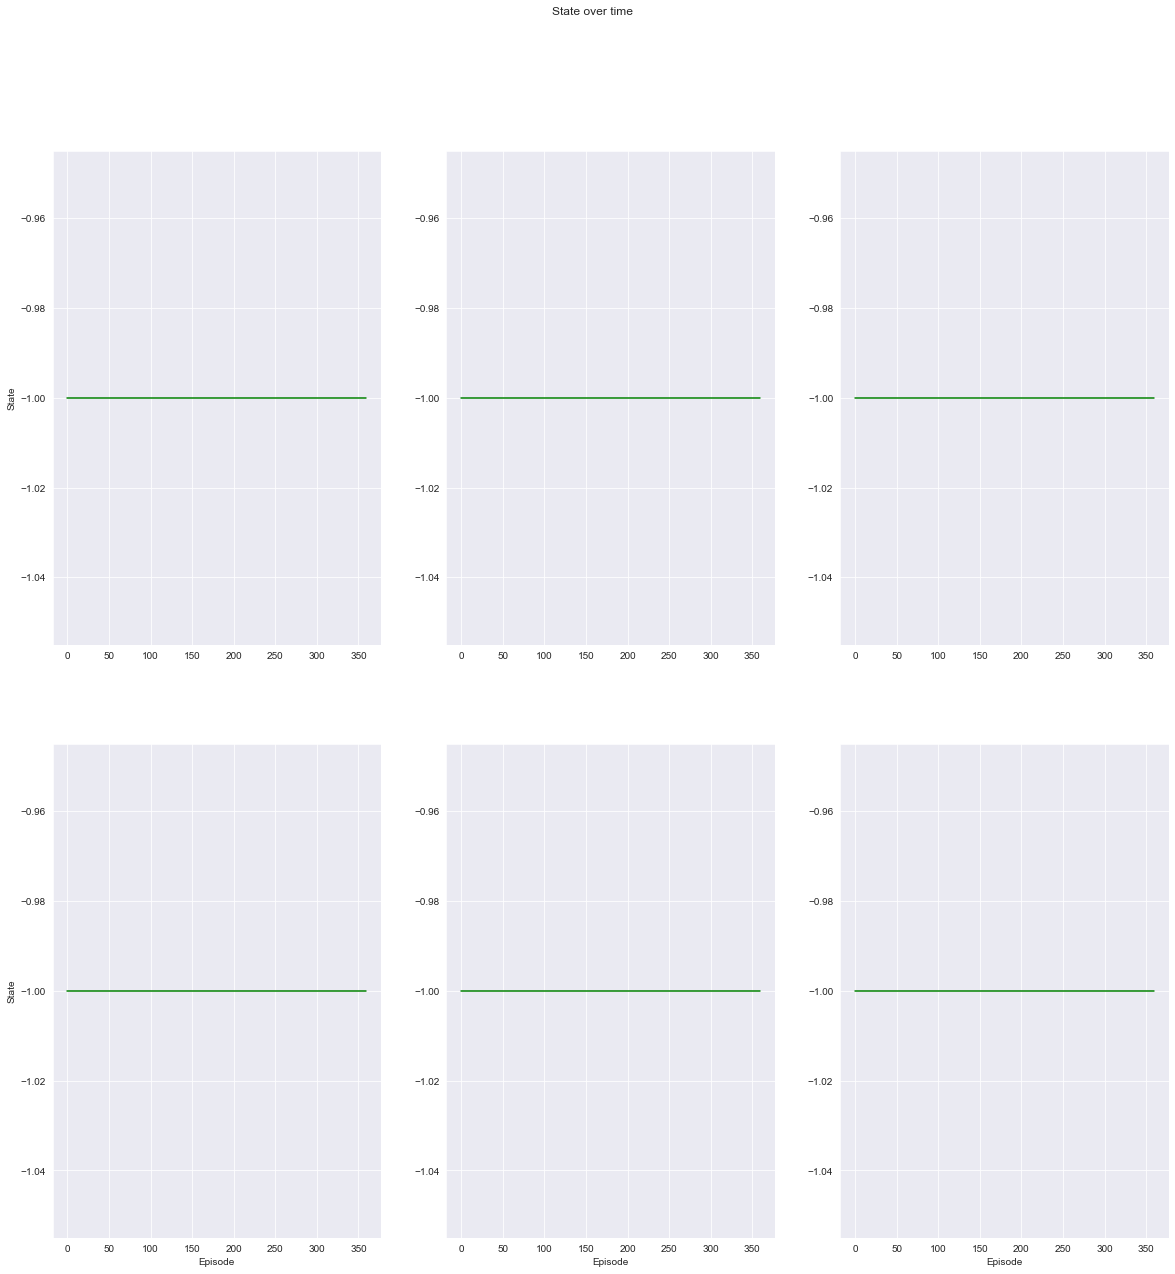

In [29]:
state_img = env.render_state_tracking()
plt.show()

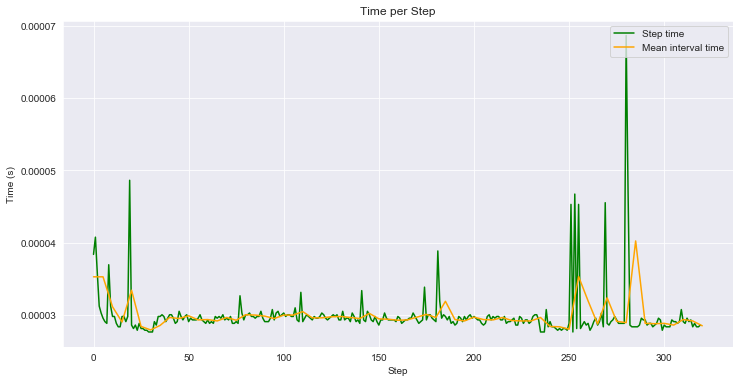

In [30]:
time_img = env.render_step_time()
plt.show()

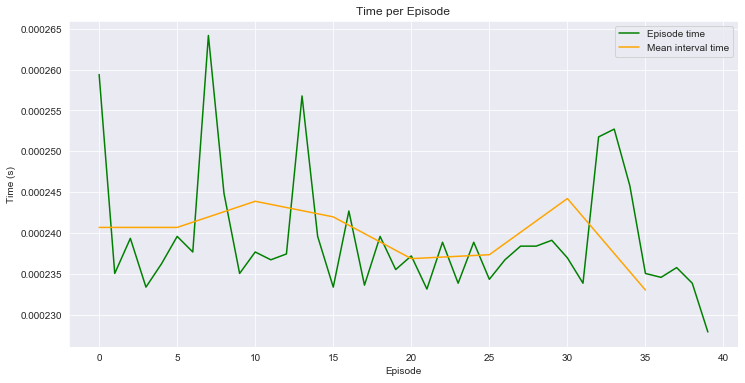

In [19]:
ep_time_img = env.render_episode_time()
plt.show()